# Problema

Implementación de la regresión lineal

## Instrucciones

Generar una implementación correcta de la regresión lineal usando el descenso del gradiente como método de optimización de los pesos y compararlo con la implementación directa de la librería sklearn (los valores de w y b no serán exactamente iguales pero muy similares)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error


In [2]:
# Generación del dataset
np.random.seed(0)  # Para reproducibilidad
X = np.random.uniform(1, 10, 5000)  # Generar 5000 valores aleatorios para las horas de estudio
error = np.random.normal(0, 5, 5000)  # Generar errores aleatorios
y = 50 + 5 * X + error  # Generar la puntuación del examen

In [3]:
X[5]

6.813047017599905

In [4]:
X.shape, y.shape

((5000,), (5000,))

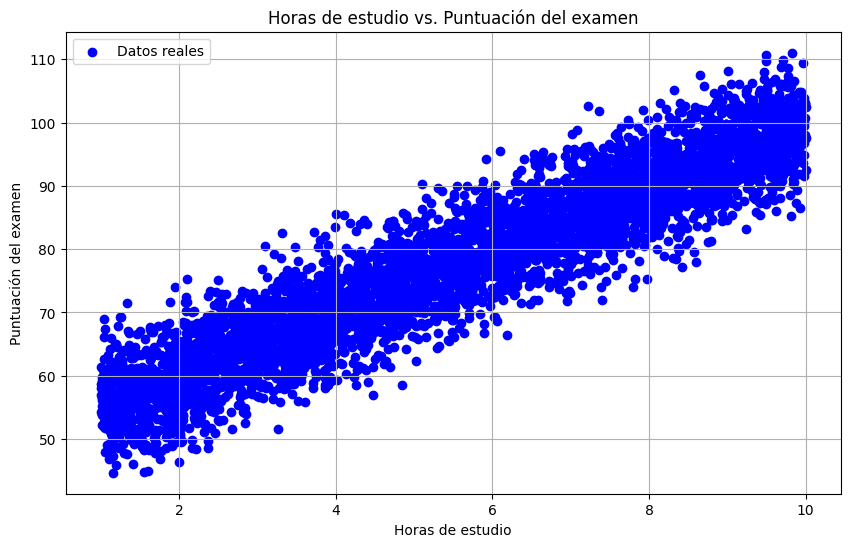

In [5]:
# Visualización de los datos
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# Dividir los datos en conjuntos de entrenamiento, validación y prueba
# 80 % TRAIN Y VAL 20 % TEST
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42) 
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  

# A COMPLETAR

print('Datos de Entrenamiento:', X_train.shape[0])
print('Datos de Validación:', X_val.shape[0])
print('Datos de Test:', X_test.shape[0])


Datos de Entrenamiento: 4000
Datos de Validación: 500
Datos de Test: 500


In [14]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")


X_train shape: (4000,)
y_train shape: (4000,)
X_val shape: (500,)
y_val shape: (500,)


## Implementación manual de la regresión con gradiente descendente

In [19]:

# Función de costo (Mean Squared Error)
def cost_function(y_true, y_pred):
    n = len(y_true)
    cost = (1/n) * np.sum((y_true - y_pred) ** 2)
    return cost


def train_regression(X_train, y_train, X_val, y_val, lr, epochs):
    w = 0  # Como solo tienes una característica, w es un escalar
    b = 0

    train_loss_per_epoch = []
    val_loss_per_epoch = []

    for epoch in range(epochs):
        # Predicción para entrenamiento
        y_pred_train = w * X_train + b

        # Calcular pérdida
        train_loss = cost_function(y_train, y_pred_train)
        train_loss_per_epoch.append(train_loss)

        # Calcular gradientes
        dw = (-2 / len(X_train)) * np.sum((y_train - y_pred_train) * X_train)
        db = (-2 / len(X_train)) * np.sum(y_train - y_pred_train)

        # Actualizar pesos
        w -= lr * dw
        b -= lr * db

        # Predicción para validación
        y_pred_val = w * X_val + b
        val_loss = cost_function(y_val, y_pred_val)
        val_loss_per_epoch.append(val_loss)

    return w, b, train_loss_per_epoch, val_loss_per_epoch



In [20]:
# Hiperparámetros
lr = 0.01 # A COMPLETAR
epochs = 1000 # A COMPLETAR

# Entrenar el modelo
w, b, train_loss_per_epoch, val_loss_per_epoch = train_regression(X_train, y_train, X_val, y_val, lr=lr, epochs=epochs)

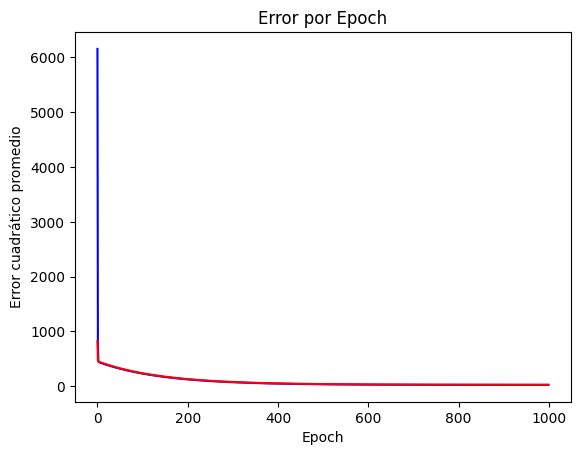

In [21]:
# Visualización del error de entrenamiento por epoch
plt.figure()
plt.plot(range(epochs), train_loss_per_epoch, '-b')
plt.plot(range(epochs), val_loss_per_epoch, '-r')
plt.xlabel('Epoch')
plt.ylabel('Error cuadrático promedio')
plt.title('Error por Epoch')
plt.show()

Costo del modelo: 23.97435038843393


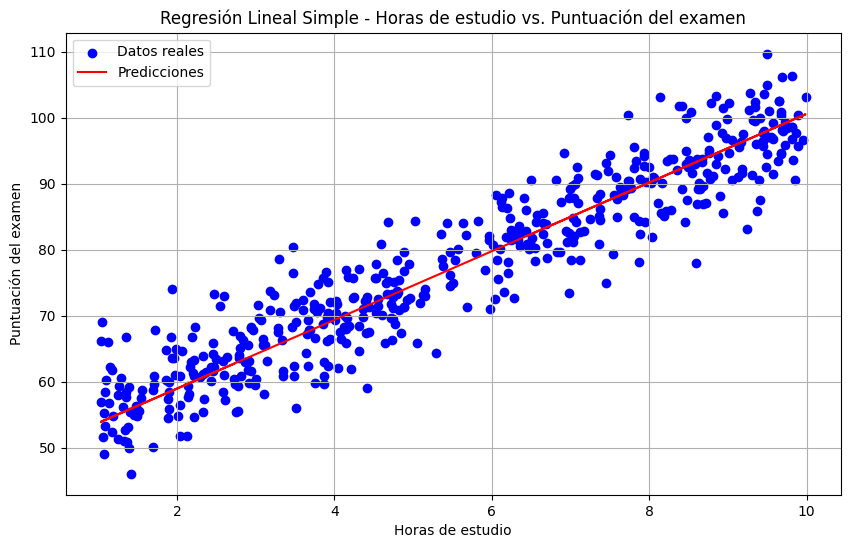

In [22]:
# Realizar predicciones en test
y_pred =  w * X_test + b # A COMPLETAR

# Calcular el costo
cost = cost_function(y_test, y_pred) # A COMPLETAR

print("Costo del modelo:", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
# Calcular las métricas de evaluación mse, mae, r2 y mape
# Calcular las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)


print("MSE en el conjunto de test:", mse)
print("MAE en el conjunto de test:", mae)
print("R^2 en el conjunto de test:", r2)
print("MAPE en el conjunto de test:", mape)

MSE en el conjunto de test: 23.97435038843393
MAE en el conjunto de test: 3.797033978534661
R^2 en el conjunto de test: 0.8802214959097939
MAPE en el conjunto de test: 0.050673489316305935


## Implementación de la regresión lineal usando sklearn

In [27]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
# Crear el modelo de regresión lineal con sklearn
# A COMPLETAR
# Entrenar modelos con regresion lineal
model = LinearRegression()
model.fit(X_train, y_train)
# linear_predictions = linear_model.predict(X_test)
# Entrenar el modelo con los datos de entrenamiento
# A COMPLETAR

LinearRegression()

Costo del modelo: 23.446722805288243


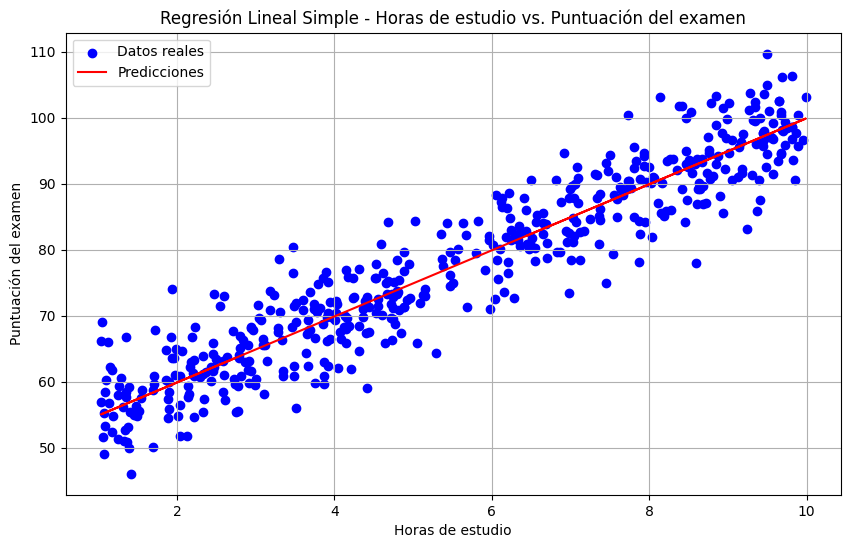

In [28]:
# Realizar predicciones en test
y_pred =model.predict(X_test) # A COMPLETAR

# Calcular el costo
cost = cost_function(y_test, y_pred)

print("Costo del modelo:", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# Calcular las métricas de evaluación mse, mae, r2 y mape
mse_linear = mean_squared_error(y_test, y_pred)
print(f'MSE Linear: {mse_linear}')
print(f'MAE Linear: {mean_absolute_error(y_test, y_pred)}')
print(f'R2 Linear: {model.score(X_test, y_test)}')
print(f'MAPE Linear: {mean_absolute_percentage_error(y_test, y_pred)}')


MSE Linear: 23.446722805288243
MAE Linear: 3.7514313225138145
R2 Linear: 0.882857581626486
MAPE Linear: 0.05025211495560561


## Comparación de parámetros obtenidos

In [29]:
b_sklearn = model.intercept_
w_sklearn = model.coef_[0]

print("Coeficiente de intercepción (b) - Manual:", b)
print("Coeficiente de pendiente (w) - Manual:", w)
print("Coeficiente de intercepción (b) - Scikit-learn:", b_sklearn)
print("Coeficiente de pendiente (w) - Scikit-learn:", w_sklearn)

Coeficiente de intercepción (b) - Manual: 48.563533994272284
Coeficiente de pendiente (w) - Manual: 5.201209038210091
Coeficiente de intercepción (b) - Scikit-learn: 49.883537234215794
Coeficiente de pendiente (w) - Scikit-learn: 5.002940257756677


Los valores de b y w son muy similares para ambos métodos, esto quiere decir que el desciente de gradiente se ha hecho bien. Mirando las métricas de error vemos que también son prácticamente iguales aunque haciendolo con el modelo linear de scikit-learn se pueden obtener resultados ligeramente mejores